Table of Contents
===================================
Introduction
--------------------
Data Wrangling
Exploratory Data Analysis
Conclusions
Reference


The dataset that will be analyzed in this report is the TMDB movie data containing information about 10,000 movies from The Movie Database (TMDB). The information includes some basic information about the movie like the title, cast, and director, and other relevant statistics such as popularity, budget, and revenue. In this report, the data analysis process will be used to answer the following questions:

What kinds of properties are associated with movies that have high revenues?
Which genres are most popular from year to year?
This report will use some libaries of Python including Numpy, Pandas, and Matplotlib. The import statement of these libraries is stated below:

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
df = pd.read_csv(r'C:\Users\Ankita\Downloads\tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [14]:
#Let us split the genre into different category for our understanding

df['genres_1']= df.genres.str.split('|').str.get(0)
df['genres_2']= df.genres.str.split('|').str.get(1)
df['genres_3']= df.genres.str.split('|').str.get(2)
df['genres_4']= df.genres.str.split('|').str.get(3)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [16]:
# Explore the shape of the dataset
df.shape

(10866, 25)

Data Cleaning: Clean the duplicated row and NaN values
Firstly, we need to check if there are any duplicated rows in this data set.

In [18]:
#check the duplicated row
df.duplicated().sum()

1

There is one duplicated row in the dataset, so this row will be dropped.

In [22]:
#Let us drop the duplicated row

df.drop_duplicates(inplace= True)
df.duplicated().sum()

0

Sometimes, not all columns are needed for analysis. Thus, the irrelevant columns are dropped and only relevant columns are kept for the further analysis.

In [26]:
drop_columns= ['id', 'imdb_id', 'original_title', 'cast', 'homepage',
             'tagline', 'keywords', 'overview', 'release_date', 'director', 'production_companies']
df.drop(drop_columns, axis=1, inplace= True)
df.head()

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_1,genres_2,genres_3,genres_4
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,NaN
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10865 non-null  float64
 1   budget        10865 non-null  int64  
 2   revenue       10865 non-null  int64  
 3   runtime       10865 non-null  int64  
 4   genres        10842 non-null  object 
 5   vote_count    10865 non-null  int64  
 6   vote_average  10865 non-null  float64
 7   release_year  10865 non-null  int64  
 8   budget_adj    10865 non-null  float64
 9   revenue_adj   10865 non-null  float64
 10  genres_1      10842 non-null  object 
 11  genres_2      8514 non-null   object 
 12  genres_3      5078 non-null   object 
 13  genres_4      1980 non-null   object 
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [32]:
df.dropna(inplace= True)
df.isnull().sum().sum()

0

In [34]:
missing_percentage= (df.isnull().sum()/len(df))*100
missing_percentage

popularity      0.0
budget          0.0
revenue         0.0
runtime         0.0
genres          0.0
vote_count      0.0
vote_average    0.0
release_year    0.0
budget_adj      0.0
revenue_adj     0.0
genres_1        0.0
genres_2        0.0
genres_3        0.0
genres_4        0.0
dtype: float64

In [36]:
# Show the basic statistics of this data set
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1980.000000,1.980000e+03,1.980000e+03,1980.000000,1980.000000,1980.000000,1980.000000,1.980000e+03,1.980000e+03
mean,0.811407,2.489403e+07,6.464546e+07,104.287879,301.993939,5.926919,1999.100505,3.017241e+07,8.131305e+07
std,1.394656,4.145917e+07,1.595460e+08,29.472059,713.920895,0.859103,12.561863,4.553186e+07,1.847415e+08
min,0.001372,0.000000e+00,0.000000e+00,4.000000,10.000000,2.200000,1960.000000,0.000000e+00,0.000000e+00
25%,0.259891,0.000000e+00,0.000000e+00,91.000000,21.000000,5.400000,1992.000000,0.000000e+00,0.000000e+00
50%,0.458286,4.000000e+06,2.576115e+05,101.000000,56.500000,6.000000,2002.000000,5.203617e+06,2.796210e+05
75%,0.904578,3.500000e+07,5.530466e+07,114.250000,232.250000,6.500000,2009.000000,4.605455e+07,7.350736e+07
max,32.985763,4.250000e+08,2.781506e+09,540.000000,9767.000000,8.800000,2015.000000,4.250000e+08,2.827124e+09


In [38]:
# Clean the invalid data and check the statistics again
index_err = df.query('runtime == 0 or budget == 0 or revenue == 0').index
df.drop(index_err, axis=0, inplace=True)

df.describe()# Show the basic statistics of this data set
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,873.000000,8.730000e+02,8.730000e+02,873.000000,873.00000,873.000000,873.000000,8.730000e+02,8.730000e+02
mean,1.362087,5.203411e+07,1.422483e+08,109.762887,618.03551,6.094731,2000.184422,6.210319e+07,1.771398e+08
std,1.940829,4.904302e+07,2.159414e+08,21.060254,984.71903,0.768693,11.019858,5.053855e+07,2.452920e+08
min,0.018196,2.100000e+01,3.000000e+00,42.000000,10.00000,2.200000,1961.000000,3.169887e+01,3.038360e+00
25%,0.499165,1.700000e+07,1.809018e+07,96.000000,84.00000,5.600000,1994.000000,2.401639e+07,2.569035e+07
50%,0.902697,3.793100e+07,6.600000e+07,106.000000,247.00000,6.100000,2003.000000,4.816486e+07,8.703022e+07
75%,1.592578,7.000000e+07,1.778416e+08,119.000000,727.00000,6.600000,2008.000000,8.728282e+07,2.328040e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.00000,8.100000,2015.000000,4.250000e+08,2.827124e+09


Research Question 1:
==========================================
What kinds of properties are associated with movies that have high revenues?

In [40]:
df.revenue.describe()

count    8.730000e+02
mean     1.422483e+08
std      2.159414e+08
min      3.000000e+00
25%      1.809018e+07
50%      6.600000e+07
75%      1.778416e+08
max      2.781506e+09
Name: revenue, dtype: float64

<Axes: >

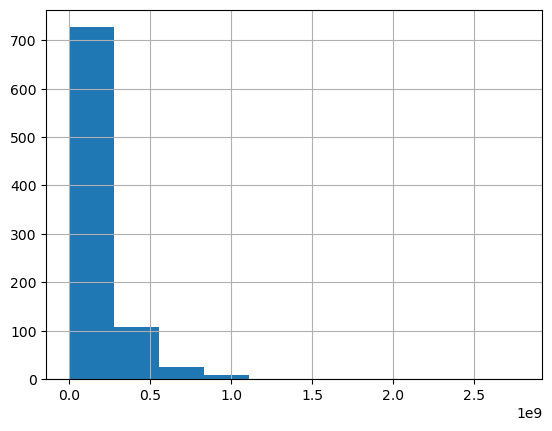

In [42]:
df.revenue.hist()

The change of revenue over year and the distribution of revenue are shown below.

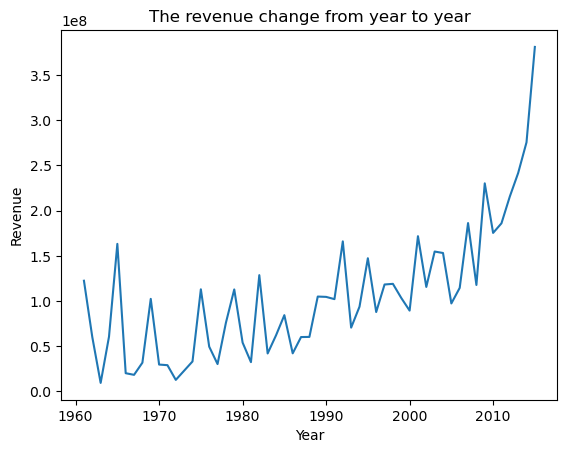

In [46]:
# Draw the line char for the change of the revenue
revenue= df.groupby("release_year")['revenue'].mean()
plt.plot(revenue)
plt.title('The revenue change from year to year')
plt.xlabel('Year')
plt.ylabel('Revenue')

plt.show()

From the line chart above, the revenue changed drastically over the year, especially during the period of 1960s. However, the revenue shows an increasing trend from the overall perspective. Next, we need to compare the revenue in different years. Since there are too many years, we aggregate them into decades.


In [48]:
bin_edges=[1960, 1970, 1980, 1990, 2000, 2010, 2015]
bin_names = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
df['decade'] = pd.cut(df["release_year"], bin_edges, labels= bin_names)
df.head()

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_1,genres_2,genres_3,genres_4,decade
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,2010s
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,2010s
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,2010s
5,9.110700,135000000,532950503,156,Western|Drama|Adventure|Thriller,3929,7.2,2015,1.241999e+08,4.903142e+08,Western,Drama,Adventure,Thriller,2010s
6,8.654359,155000000,440603537,125,Science Fiction|Action|Thriller|Adventure,2598,5.8,2015,1.425999e+08,4.053551e+08,Science Fiction,Action,Thriller,Adventure,2010s


C:\Users\Ankita\AppData\Local\Temp\ipykernel_4172\477278137.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rev_dec = df.groupby("decade").revenue.mean()


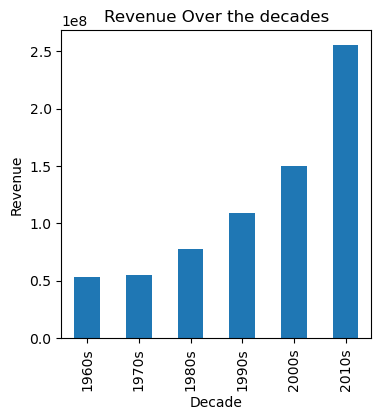

In [59]:
# Draw the bar chart to compare the revenue in differet decades
rev_dec = df.groupby("decade").revenue.mean()
plt.figure(figsize=(4,4))
rev_dec.plot(kind= "bar")
plt.title("Revenue Over the decades")
plt.xlabel('Decade')
plt.ylabel('Revenue')

plt.show()

In [ ]:
From the bar char above, the revenue increased over the year. The 2010s accounts for the most, while the 1960s accounts for the least.

Next, we need to find the pattern of the high revenue.
To order to discover the pattern of the group of high revenues, it is defined that the high revenue is the revenue above the 75% percentile.

In [61]:
# Extract the high revenue dataframe
high_revenue = df.revenue.quantile(.75)
high_rev_df = df[df.revenue > high_revenue]
high_rev_df.revenue.describe()

count    2.180000e+02
mean     4.123966e+08
std      2.874250e+08
min      1.780516e+08
25%      2.448147e+08
50%      3.419136e+08
75%      4.766422e+08
max      2.781506e+09
Name: revenue, dtype: float64

Now, we need to discover the correlation between different variables. In this question, three variables will be selected:'popularity', 'vote_average', and 'budget'. The scatterplot and correlation calculation will be used to analyze these correlations. The first group to discover is the correlation of 'popularity' and 'revenue'.

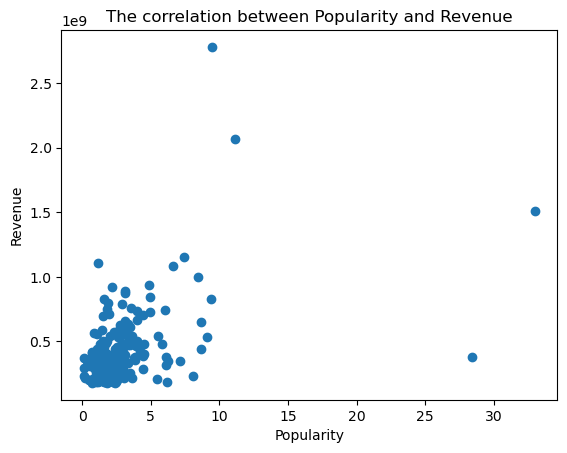

In [63]:
plt.scatter(x=high_rev_df.popularity, y=high_rev_df.revenue)
plt.title('The correlation between Popularity and Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')

plt.show()

In [65]:
high_rev_df[['popularity', 'revenue']].corr()

,popularity,revenue
popularity,1.000000,0.464818
revenue,0.464818,1.000000


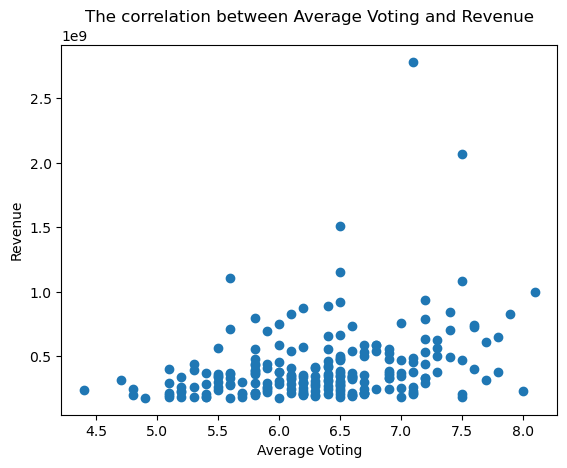

In [67]:
# Draw the scatterplot of the vote_average and revenue
plt.scatter(x=high_rev_df.vote_average, y=high_rev_df.revenue)
plt.title('The correlation between Average Voting and Revenue')
plt.xlabel('Average Voting')
plt.ylabel('Revenue')

plt.show()

In [69]:
high_rev_df[['vote_average', 'revenue']].corr()

,vote_average,revenue
vote_average,1.000000,0.313001
revenue,0.313001,1.000000


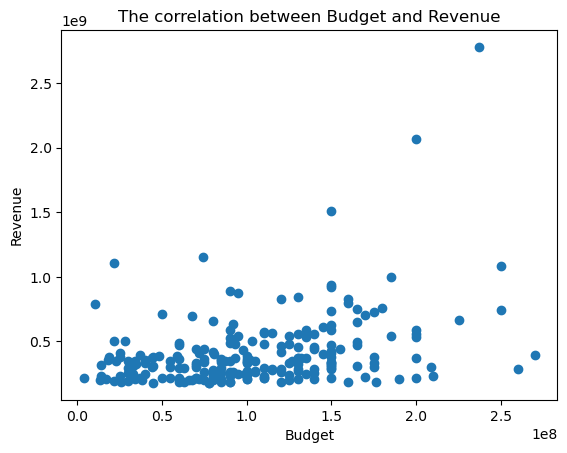

In [71]:
# Draw the scatterplot of the budget and revenue
plt.scatter(x=high_rev_df.budget, y=high_rev_df.revenue)
plt.title('The correlation between Budget and Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')

plt.show()

In [73]:
high_rev_df[['budget', 'revenue']].corr()

,budget,revenue
budget,1.000000,0.346448
revenue,0.346448,1.000000


Research Question 2: Which genres are most popular from year to year?

In [77]:
df_generes= df[['release_year', 'genres', 'popularity']]
df_generes.head()

,release_year,genres,popularity
0,2015,Action|Adventure|Science Fiction|Thriller,32.985763
1,2015,Action|Adventure|Science Fiction|Thriller,28.419936
3,2015,Action|Adventure|Science Fiction|Fantasy,11.173104
5,2015,Western|Drama|Adventure|Thriller,9.110700
6,2015,Science Fiction|Action|Thriller|Adventure,8.654359


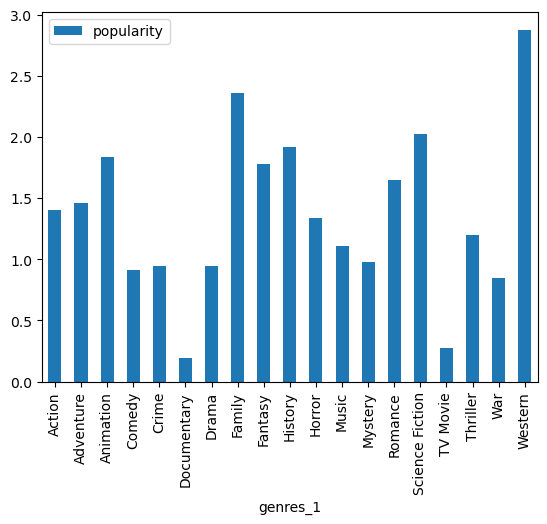

In [87]:
#Find the relationship between the first film genres and the popularity.
df.groupby('genres_1')['popularity'].mean().plot(kind='bar', label ="popularity")
#As you can see, the most popular films along the years are Adventure, Romance and Actions movies.
plt.legend()

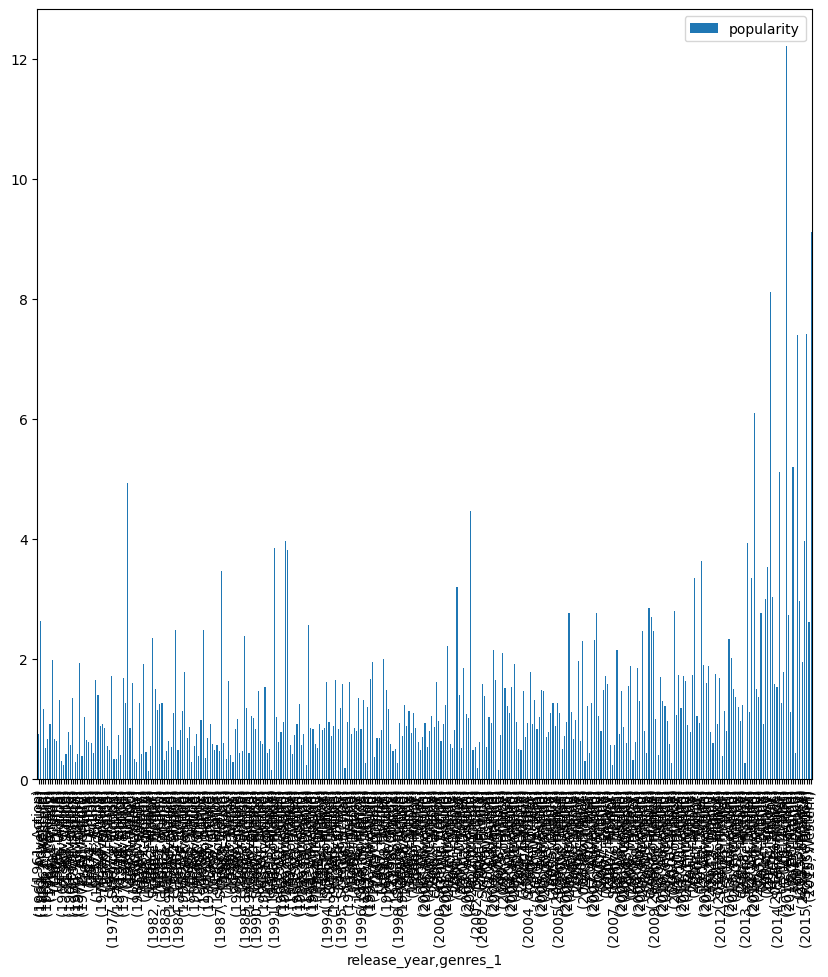

In [91]:
#let's check what are the most popular genre movies from year to year
df.groupby(['release_year','genres_1'])['popularity'].mean().plot(kind='bar',figsize=(10,10), label="popularity")
#Show the plot and see the relationship
plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

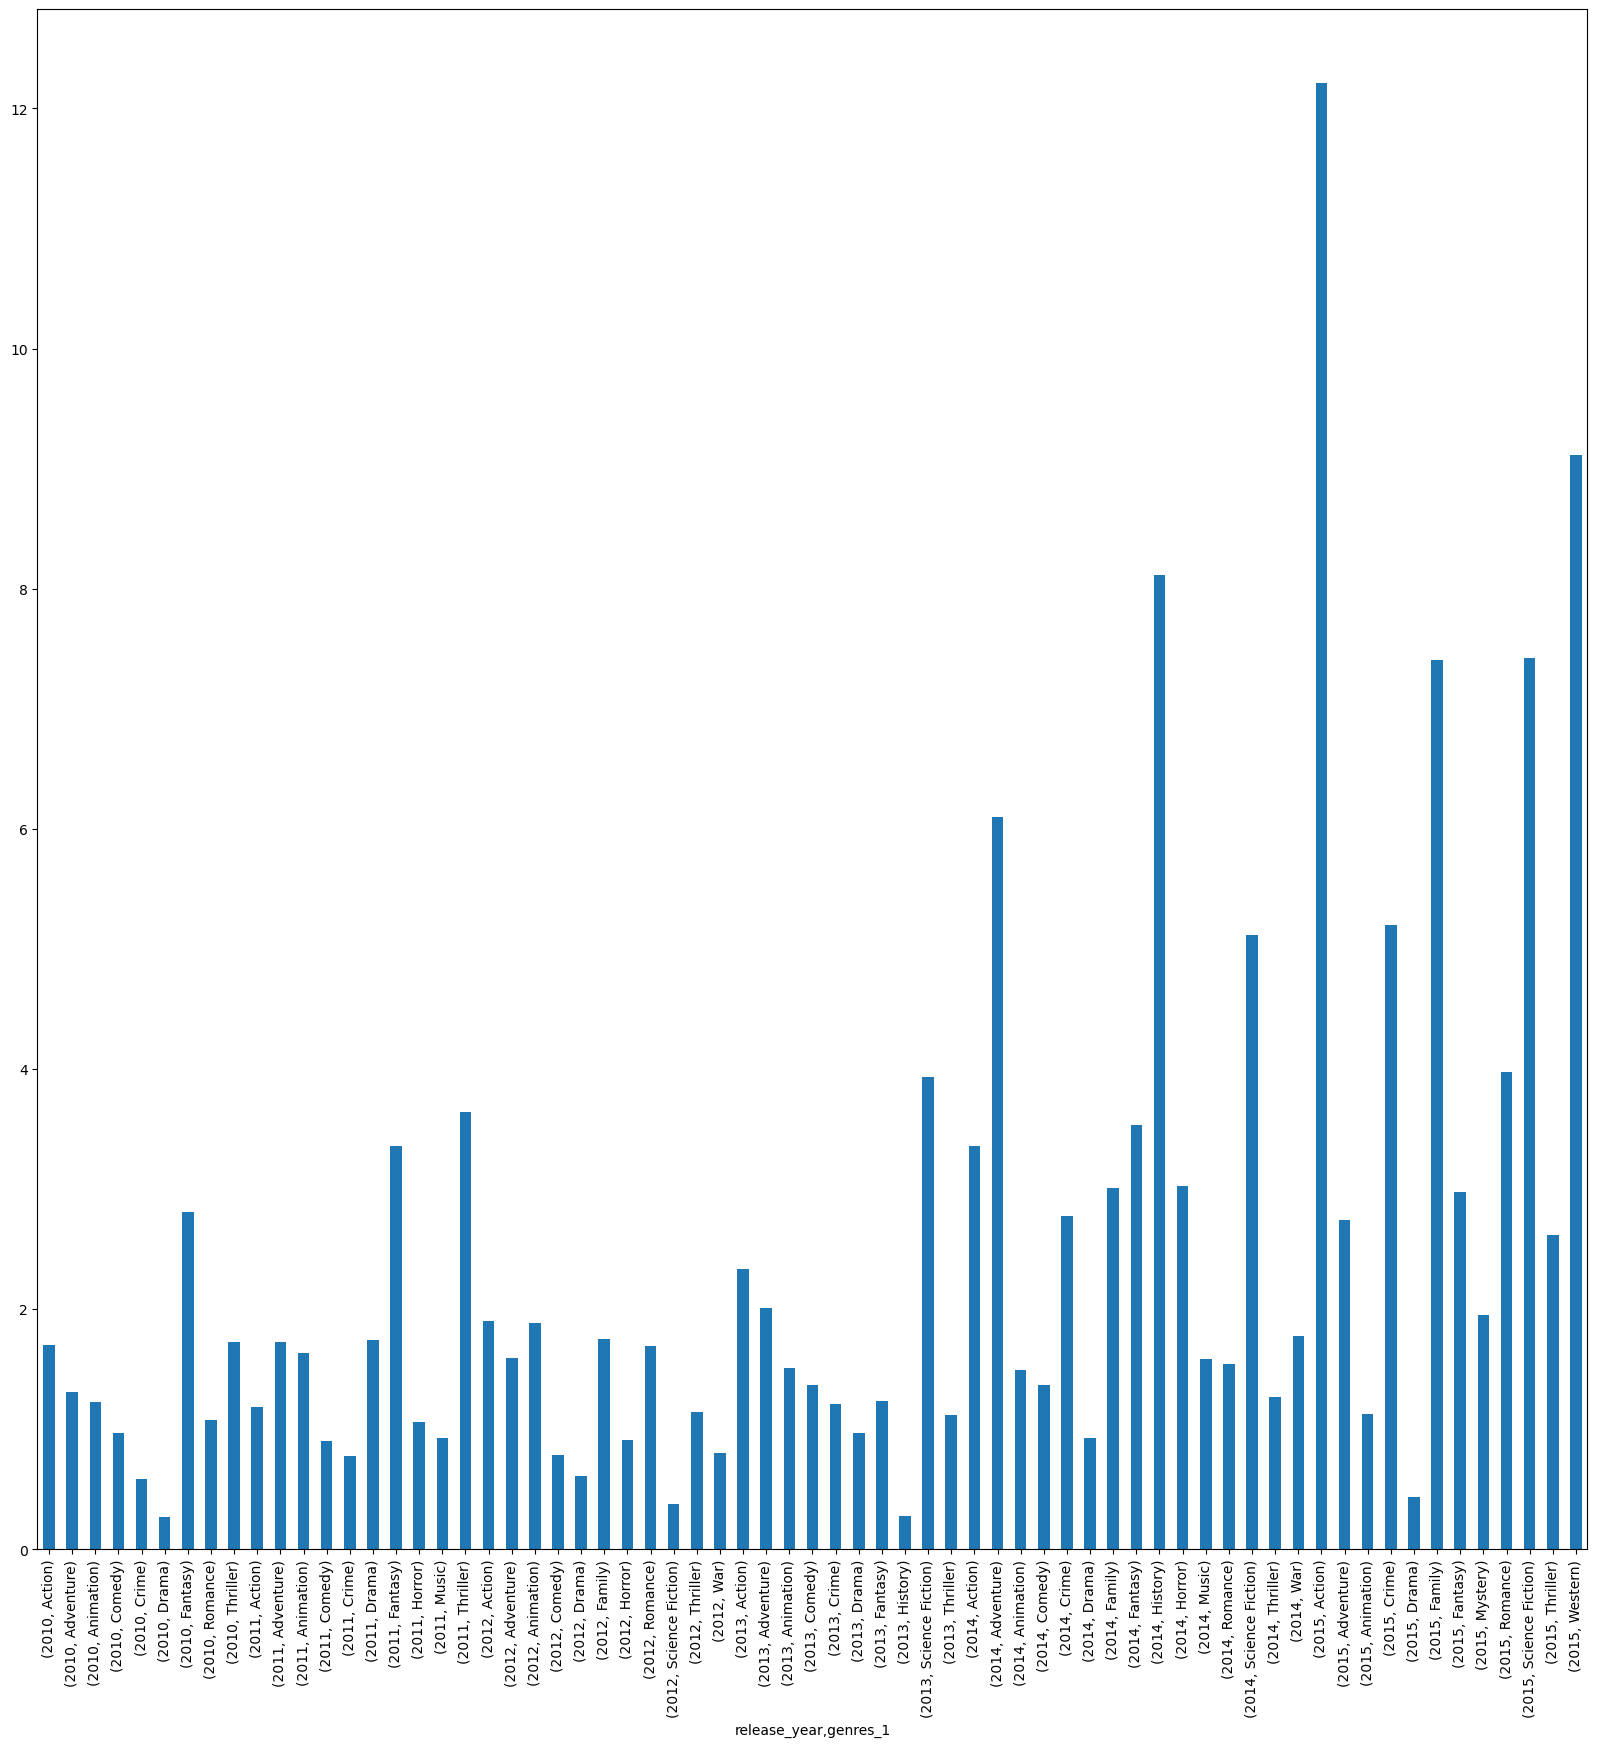

In [100]:
#So let´s choose the last 5 years to analyze, it is more feasible.
last_5_years = df[df['release_year'] >= 2010]
last_5_years.groupby(['release_year','genres_1'])['popularity'].mean().plot(kind='bar',figsize=(20,20), label="popularity")
plt.legend

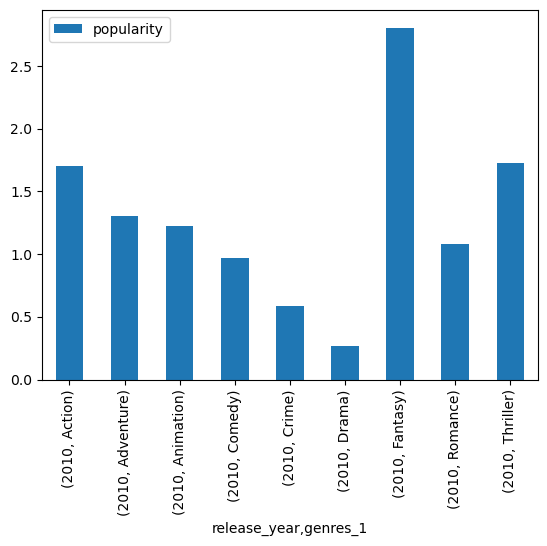

In [104]:
year_2010 = df[df['release_year'] == 2010]
year_2011 = df[df['release_year'] == 2011]
year_2012 = df[df['release_year'] == 2012]
year_2013 = df[df['release_year'] == 2013]
year_2014 = df[df['release_year'] == 2014]
year_2015 = df[df['release_year'] == 2015]

year_2010.groupby(['release_year','genres_1'])['popularity'].mean().plot(kind='bar', label ="popularity")
plt.legend()
plt.show()

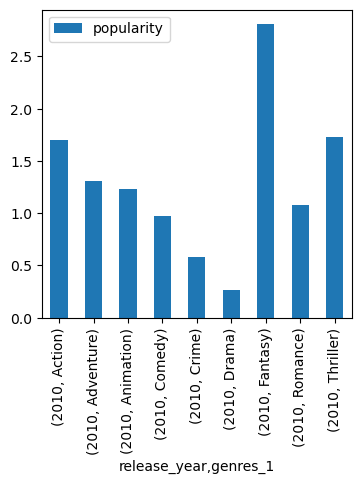

In [112]:
#Run the plot for the relatinship between genre and popularity in 2011
plt.figure(figsize = (4,4))
year_2010.groupby(['release_year','genres_1'])['popularity'].mean().plot(kind='bar', x= ["genres_1"], y= ["popularity"])
plt.legend()

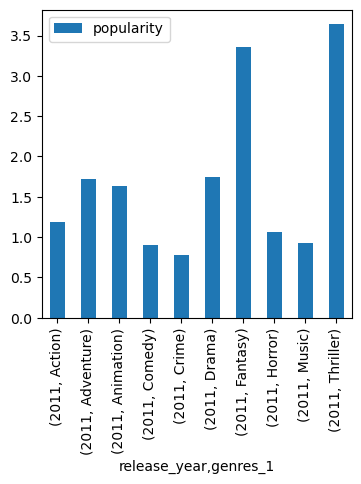

In [114]:
#Run the plot for the relatinship between genre and popularity in 2011
plt.figure(figsize = (4,4))
year_2011.groupby(['release_year','genres_1'])['popularity'].mean().plot(kind='bar', x= ["genres_1"], y= ["popularity"])
plt.legend()

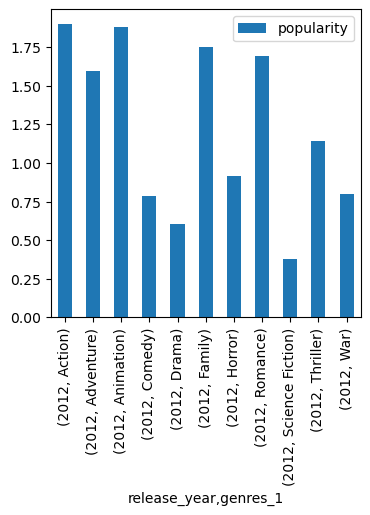

In [116]:
#Run the plot for the relatinship between genre and popularity in 2011
plt.figure(figsize = (4,4))
year_2012.groupby(['release_year','genres_1'])['popularity'].mean().plot(kind='bar', x= ["genres_1"], y= ["popularity"])
plt.legend()

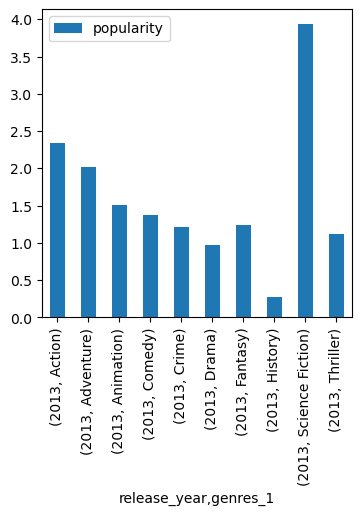

In [118]:
#Run the plot for the relatinship between genre and popularity in 2011
plt.figure(figsize = (4,4))
year_2013.groupby(['release_year','genres_1'])['popularity'].mean().plot(kind='bar', x= ["genres_1"], y= ["popularity"])
plt.legend()

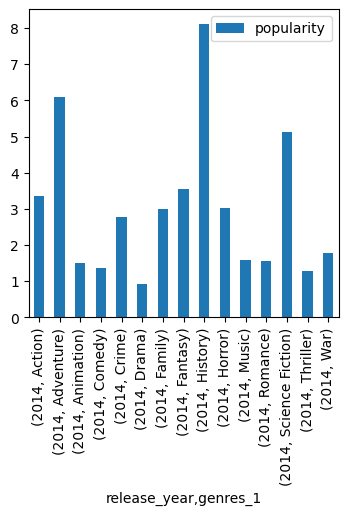

In [120]:
#Run the plot for the relatinship between genre and popularity in 2011
plt.figure(figsize = (4,4))
year_2014.groupby(['release_year','genres_1'])['popularity'].mean().plot(kind='bar', x= ["genres_1"], y= ["popularity"])
plt.legend()

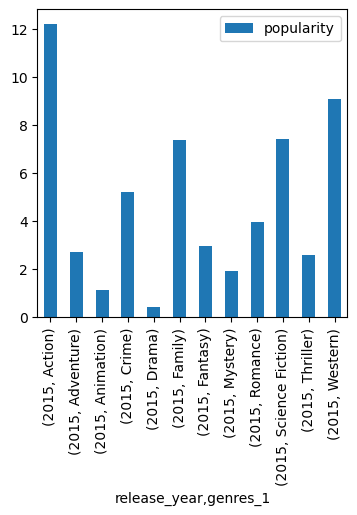

In [122]:
#Run the plot for the relatinship between genre and popularity in 2011
plt.figure(figsize = (4,4))
year_2015.groupby(['release_year','genres_1'])['popularity'].mean().plot(kind='bar', x= ["genres_1"], y= ["popularity"])
plt.legend()

Research Question 2: What kinds of properties are associated with movies that have high revenues? Does higher budget films receive higher revenue? Or does the higher voted score films have the higher revenue?

In [135]:
#let us see which movies have higher budget
df[df['budget'].notnull()][["original_title","budget", "revenue"]].sort_values("budget", ascending=False).head(10)

,original_title,budget,revenue
2244,The Warrior's Way,425000000,11087569
3375,Pirates of the Caribbean: On Stranger Tides,380000000,1021683000
7387,Pirates of the Caribbean: At World's End,300000000,961000000
14,Avengers: Age of Ultron,280000000,1405035767
6570,Superman Returns,270000000,391081192
4411,John Carter,260000000,284139100
1929,Tangled,260000000,591794936
7394,Spider-Man 3,258000000,890871626
5508,The Lone Ranger,255000000,89289910
4367,The Hobbit: An Unexpected Journey,250000000,1017003568


As we can see, the highest budget films did not have the highest revenue. And the highest revenue films are not the films with the higest budget. The budget is not the factor which associate with the higher revenue.

In [137]:
#I will like to know what movies have the most budget.
df[df['vote_average'].notnull()][['original_title','vote_average','revenue']].sort_values('vote_average',ascending=False).head(20)

,original_title,vote_average,revenue
3894,The Story of Film: An Odyssey,9.2,0
538,The Mask You Live In,8.9,0
2269,Life Cycles,8.8,0
1200,Black Mirror: White Christmas,8.8,0
6911,Pink Floyd: Pulse,8.7,0
2401,Opeth: In Live Concert At The Royal Albert Hall,8.6,0
3690,The Art of Flight,8.5,0
8411,Queen - Rock Montreal,8.5,0
8221,A Personal Journey with Martin Scorsese Throug...,8.5,0
5830,Doctor Who: The Time of the Doctor,8.5,0


In [139]:
#Let´s try to see how is the revenue related to the vote average score
df[df['revenue'].notnull()][['original_title','vote_average','revenue']].sort_values('revenue',ascending=False).head(10)

,original_title,vote_average,revenue
1386,Avatar,7.1,2781505847
3,Star Wars: The Force Awakens,7.5,2068178225
5231,Titanic,7.3,1845034188
4361,The Avengers,7.3,1519557910
0,Jurassic World,6.5,1513528810
4,Furious 7,7.3,1506249360
14,Avengers: Age of Ultron,7.4,1405035767
3374,Harry Potter and the Deathly Hallows: Part 2,7.7,1327817822
5422,Frozen,7.5,1274219009
5425,Iron Man 3,6.9,1215439994


As you can see, the vote average score does not affect directly the revenue neither
Then let´s assume the film genre and the popularity will affect the revenue?

In [145]:
#we need to know the relationship between the popularity and revenue, well, maybe also the genre
df[df['popularity'].notnull()][['genres','popularity','revenue']].sort_values('popularity',ascending=False).head(20)

,genres,popularity,revenue
0,Action|Adventure|Science Fiction|Thriller,32.985763,1513528810
1,Action|Adventure|Science Fiction|Thriller,28.419936,378436354
629,Adventure|Drama|Science Fiction,24.949134,621752480
630,Action|Science Fiction|Adventure,14.311205,773312399
2,Adventure|Science Fiction|Thriller,13.112507,295238201
631,Action|Adventure|Science Fiction,12.971027,714766572
1329,Adventure|Action|Science Fiction,12.037933,775398007
632,Action|Thriller,11.422751,78739897
3,Action|Adventure|Science Fiction|Fantasy,11.173104,2068178225
633,Science Fiction|Adventure|Thriller,10.739009,752100229
